In [2]:
from Software_2 import sktime_distance_comparison, explain_methods

C:\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\.venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/9
299/299 [==============================] - 2s 5ms/step - loss: 458.0446 - val_loss: 53.4693
Epoch 2/9
299/299 [==============================] - 1s 5ms/step - loss: 139.3618 - val_loss: 52.0430
Epoch 3/9
299/299 [==============================] - 1s 5ms/step - loss: 116.8413 - val_loss: 40.6726
Epoch 4/9
299/299 [==============================] - 1s 5ms/step - loss: 103.7427 - val_loss: 34.4020
Epoch 5/9
299/299 [==============================] - 1s 5ms/step - loss: 95.8992 - val_loss: 30.5482
Epoch 6/9
299/299 [==============================] - 1s 5ms/step - loss: 95.4070 - val_loss: 17.1634
Epoch 7/9
299/299 [==============================] - 1s 5ms/step - loss: 89.2959 - val_loss: 25.4843
Epoch 8/9
299/299 [==============================] - 1s 5ms/step - loss: 88.1795 - val_loss: 42.3149
Epoch 9/9
299/299 [==============================] - 1s 5ms/step - loss: 84.4541 - val_loss: 19.8029


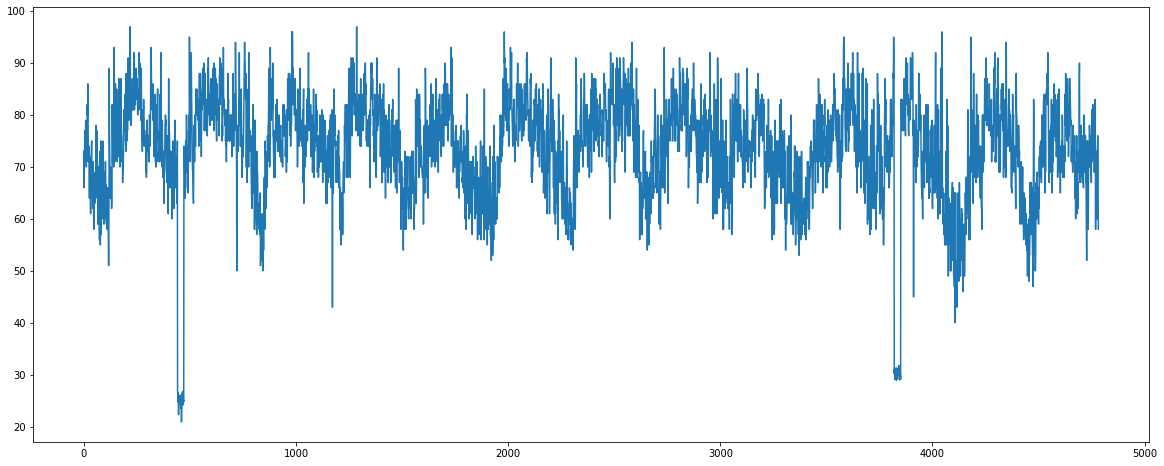

In [3]:
import pandas as pd
import numpy as np
import math
from numpy import array
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from Software import cbrFox


def split_sequences(sequences, n_steps):
    inputnn, target = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix + 1 > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix, (1, 4, 7)]
        inputnn.append(seq_x)
        target.append(seq_y)
    return array(inputnn), array(target)


data = pd.read_csv("C:\\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\sourceCode\weatherdata.csv", parse_dates=True, index_col=1)

data
np.max(data.filter(['HUM_MAX']).values)
step_days = 14
dataset = data.filter(['HUM_MIN', 'HUM_AVG', 'HUM_MAX', 'PRES_MIN', 'PRES_AVG', 'PRES_MAX', 'TEMP_MIN',
                       'TEMP_AVG', 'TEMP_MAX']).values
dataset = np.array(dataset)
# dataset = MinMaxScaler().fit_transform(dataset)
global inputnn, target, input_train, input_test, target_test, target_train
inputnn, target = split_sequences(dataset, step_days)
input_train, input_test, target_train, target_test = train_test_split(inputnn, target, test_size=0.30,
                                                                      random_state=4, shuffle=False)
plt.figure(figsize=(20, 8))
plt.plot(target_train[:, 0])
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(step_days, input_train.shape[2])))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')
history = model.fit(input_train, target_train, validation_data=(input_test, target_test), batch_size=16, epochs=9)

In [4]:
prediction_train = model.predict(input_train)

In [5]:
RMSE = math.sqrt(np.square(np.subtract(prediction_train, target_train)).mean())
print("Root Mean Square Error Train:\n", RMSE)
prediction = model.predict(input_test)
RMSE = math.sqrt(np.square(np.subtract(prediction, target_test)).mean())
print("Root Mean Square Error Test:\n", RMSE)

Root Mean Square Error Train:
 4.8729851514593765
Root Mean Square Error Test:
 4.450041153849246


In [6]:
prediction = model.predict(inputnn[-1].reshape((1, 14, 9)))

In [7]:
windows = inputnn[0:-1]
targetWindow = inputnn[-1]
num_cases = 5
target = target
smoothnessFactor = .04
inputNames = ['HUM_MIN', 'HUM_AVG', 'HUM_MAX', 'PRES_MIN', 'PRES_AVG', 'PRES_MAX', 'TEMP_MIN',
              'TEMP_AVG', 'TEMP_MAX']
outputNames = ['HUM_AVG', 'PRES_AVG', 'TEMP_AVG']
punishedSumFactor = .5

In [9]:
dictionary = explain_methods(windows=windows, targetWindow=targetWindow, target=target, prediction=prediction, num_cases=num_cases,
smoothnessFactor=smoothnessFactor, inputNames=inputNames, outputNames=outputNames,
punishedSumFactor=punishedSumFactor, methods=["CCI","DTW"])

Calculando correlación de Pearson
Calculando correlación de Pearson


C:\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\.venv\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\.venv\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Calculando distancia Euclidiana
Calculando MAE para cada ventana
Generando reporte de análisis


C:\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\.venv\lib\site-packages\sktime\utils\numba\njit.py:6: UserWarning: No module named 'numba'. 'numba' is a soft dependency and not included in the base sktime installation. Please run: `pip install numba` to install the numba package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  if _check_soft_dependencies("numba", severity="warning"):


Calculando MAE para cada ventana
Generando reporte de análisis


In [11]:
dictionary["CCI"].getAnalysisreport()

,index,CCI,MAE,index.1,CCI.1,MAE.1
0,4972,1.000000,3.822124,4809,0.410155,17.655458
1,263,0.979834,1.372124,1841,0.423713,12.238791
2,6062,0.975253,4.124838,3653,0.437751,7.605458
3,6410,0.967463,2.722523,1101,0.440702,13.955458
4,2072,0.960770,5.388791,14,0.447507,10.138791


In [63]:
cbrFoxInstancia = sktime_distance_comparison(windows=windows, targetWindow=targetWindow, target=target, prediction=prediction, num_cases=num_cases,
                         smoothnessFactor=smoothnessFactor, inputNames=inputNames, outputNames=outputNames,
                         punishedSumFactor=punishedSumFactor, method="CCI")

In [64]:
cbrFoxInstancia.explain_all(["DTW"])

Processing method DTW
Calculando MAE para cada ventana
Generando reporte de análisis


In [8]:
cbrFoxInstancia.explain()

C:\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\.venv\lib\site-packages\sktime\utils\numba\njit.py:6: UserWarning: No module named 'numba'. 'numba' is a soft dependency and not included in the base sktime installation. Please run: `pip install numba` to install the numba package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  if _check_soft_dependencies("numba", severity="warning"):


Calculando MAE para cada ventana
Generando reporte de análisis


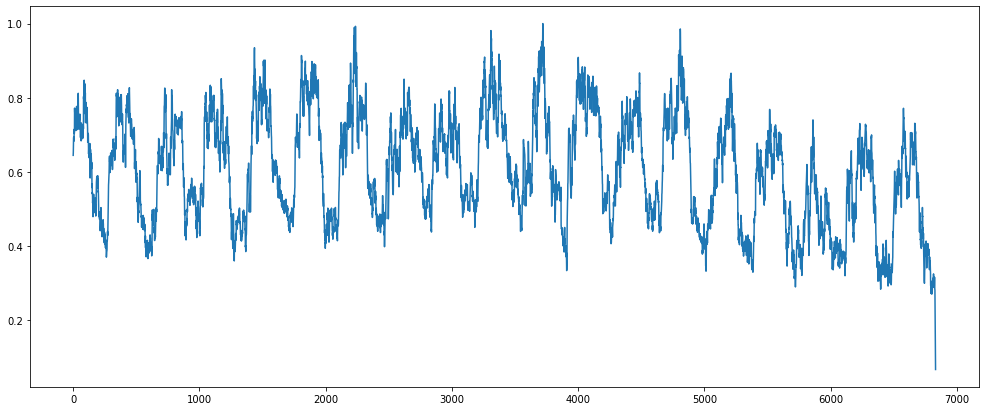

In [9]:
cbrFoxInstancia.visualizeCorrelationPerWindow()

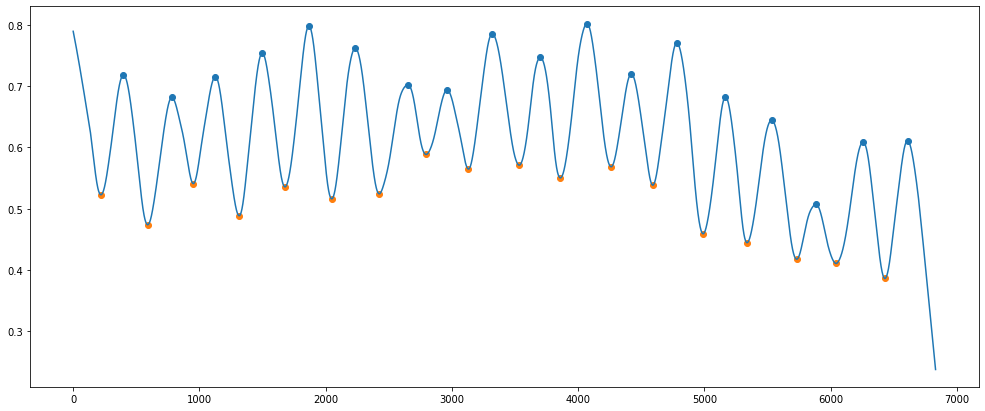

In [10]:
 cbrFoxInstancia.visualizeSmoothedCorrelation()

C:\Users\jerry\AppData\Local\Temp\ipykernel_25640\2038982809.py:1: DeprecationWarning: Call to deprecated method visualizeBestHistoryPredictions. (If a selected window either best or worst, has an index positionclose to the end, there will not be further predictions to plot) -- Deprecated since version 1.2.0.
  cbrFoxInstancia.visualizeBestHistoryPredictions(figsize= (17, 6*3))


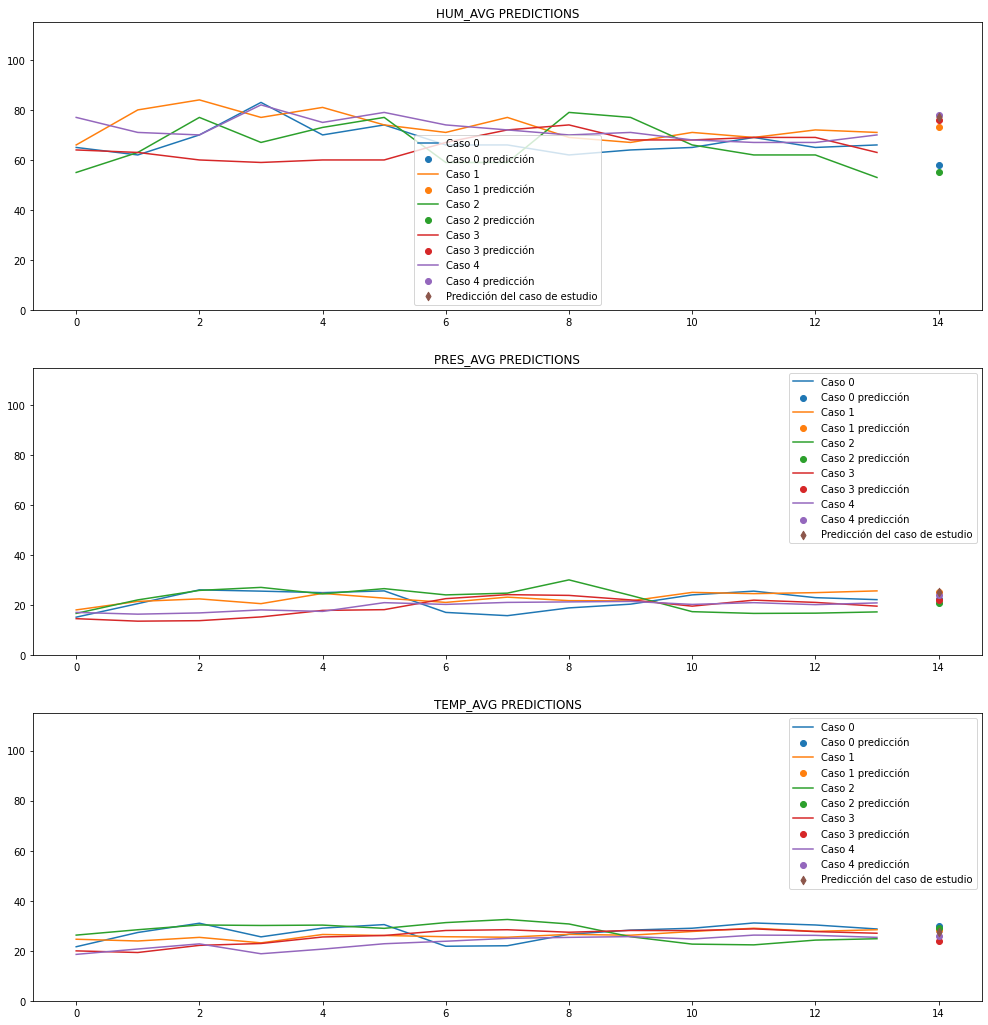

In [11]:
cbrFoxInstancia.visualizeBestHistoryPredictions(figsize= (17, 6*3))

9.338893127441406
7.038893127441406
10.622226460774739
10.42222646077474
5.728131612141927


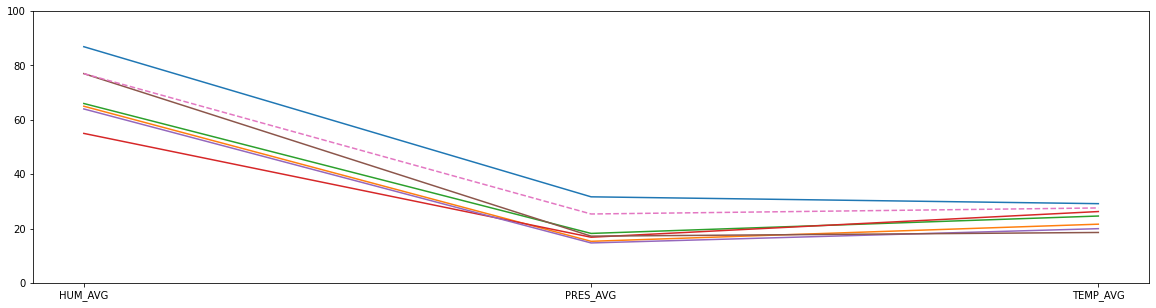

In [12]:
cbrFoxInstancia.visualizeBestCasePredictions()

C:\Users\jerry\AppData\Local\Temp\ipykernel_25640\3496779848.py:1: DeprecationWarning: Call to deprecated method visualizeWorstHistoryPredictions. (If a selected window either best or worst, has an index positionclose to the end, there will not be further predictions to plot) -- Deprecated since version 1.2.0.
  cbrFoxInstancia.visualizeWorstHistoryPredictions(figsize= (17, 6*3))


IndexError: index 6846 is out of bounds for axis 0 with size 6833

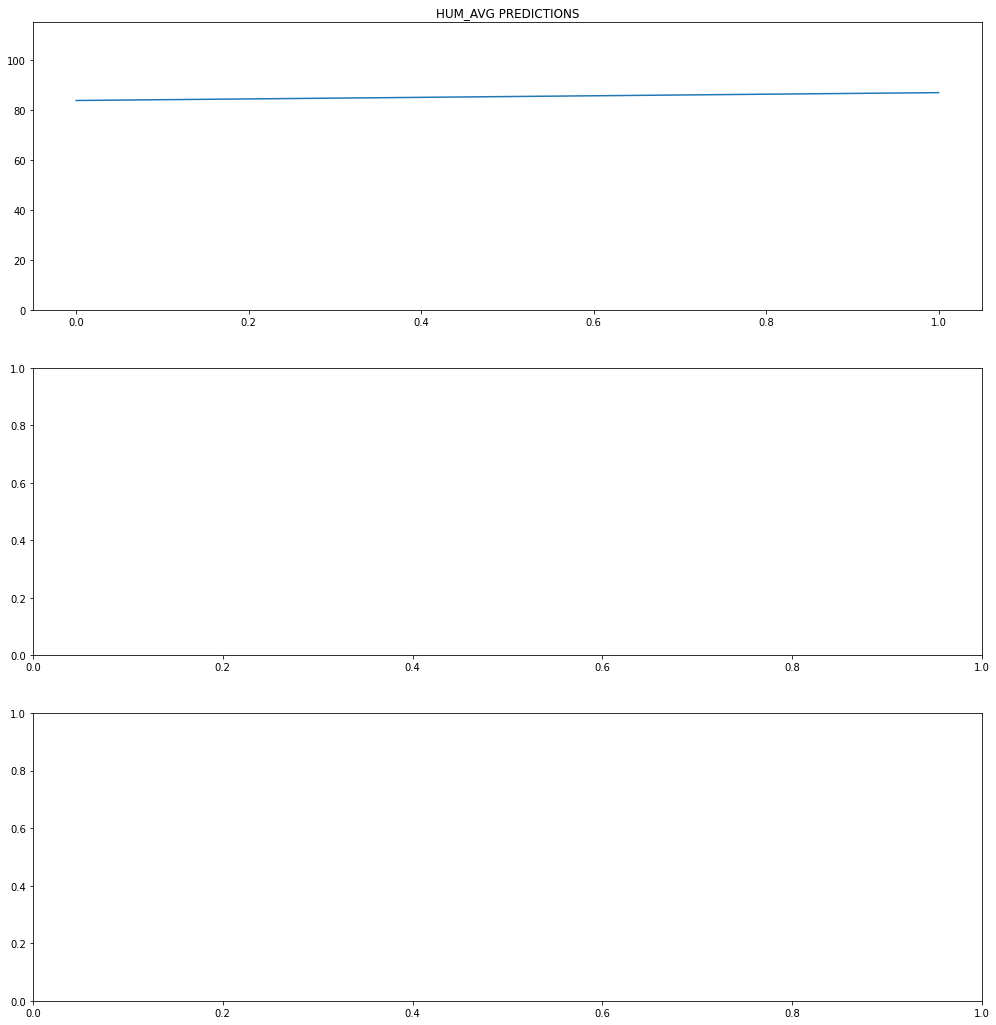

In [13]:
cbrFoxInstancia.visualizeWorstHistoryPredictions(figsize= (17, 6*3))

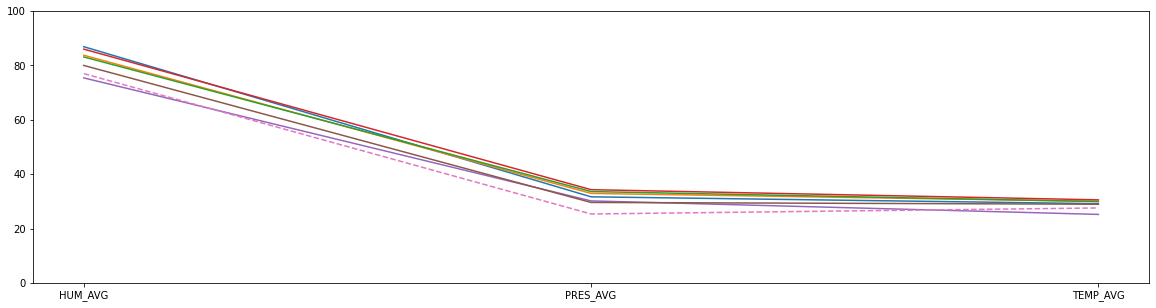

In [14]:
cbrFoxInstancia.visualizeWorstCasePredictions()

In [15]:
cbrFoxInstancia.getAnalysisreport()

,index,CCI,MAE,index.1,CCI.1,MAE.1
0,3720,1.000000,9.338893,6831,0.066356,5.589012
1,2236,0.992623,7.038893,6396,0.283114,5.580778
2,4809,0.985478,10.622226,5721,0.289228,6.977774
3,3309,0.981053,10.422226,6114,0.319432,2.921095
4,1436,0.934815,5.728132,5384,0.328894,2.877774


In [54]:
# cbrFoxInstancia.explain_all(["MSM", "DTW", "CCI"])
cbrFoxInstancia.explain_all(["CCI"])

Processing method CCI
Calculando correlación de Pearson
Calculando correlación de Pearson


IndexError: At least one sheet must be visible

In [28]:
# Create a Pandas Excel writer using openpyxl as the engine
with pd.ExcelWriter('output.xlsx', engine='openpyxl') as writer:
    # Write each dataframe to a different sheet
    cbrFoxInstancia.getAnalysisreport().to_excel(writer, sheet_name='Sheet1', index=False)
    cbrFoxInstancia.getAnalysisreport().to_excel(writer, sheet_name='Sheet1', index=False)
    